# Chapter 4, Example 3a
## Three-way data split on Iris data

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn import datasets

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import os
if not os.path.isdir('figures'):
    os.makedirs('figures')

In [2]:
no_epochs = 1000

no_labels = 3
no_features = 4
hidden_units = [2, 4, 6, 8, 10, 12]

no_folds = 3

seed = 10
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
def train_exp(X, Y):

    x_train, y_train = X[:50], Y[:50]
    x_valid, y_valid = X[50:100], Y[50:100] 
    x_test, y_test = X[100:], Y[100:]

    acc = []
    for no_hidden in hidden_units:
        
        model = Sequential([
            Dense(no_hidden, activation='relu'),
            Dense(no_labels, activation='softmax')])
    
        model.compile(optimizer='sgd',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    
        history = model.fit(x_train, y_train,
                            epochs=no_epochs,
                            verbose=0,
                            use_multiprocessing=False,
                            validation_data=(x_valid, y_valid))
    
        acc_ = history.history['val_accuracy'][no_epochs-1]
        acc.append(acc_)
        print('hidden units %d mean error = %g'% (no_hidden, acc_))
        
    no_hidden = hidden_units[np.argmax(acc)]
    
    x_train, y_train = X[:100], Y[:100]
    
    model = Sequential([
                Dense(no_hidden, activation='relu'),
                Dense(no_labels, activation='softmax')])
    
    model.compile(optimizer='sgd',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                        epochs=no_epochs,
                        verbose=0,
                        use_multiprocessing=False,
                        validation_data=(x_test, y_test))
    
    return acc, no_hidden, history.history['val_accuracy'][no_epochs-1]

In [4]:
# input data
iris = datasets.load_iris()
iris.data -= np.mean(iris.data, axis=0)

X = iris.data
Y = iris.target
no_data = len(iris.data)

idx = np.arange(no_data)
np.random.shuffle(idx)
        
acc, no_hidden, opt_acc = train_exp(X[idx], Y[idx])
 
print('* hidden units %d accuracy %g *'%(no_hidden, opt_acc))

hidden units 2 mean error = 0.94
hidden units 4 mean error = 0.94
hidden units 6 mean error = 0.94
hidden units 8 mean error = 0.94
hidden units 10 mean error = 0.96
hidden units 12 mean error = 0.96
* hidden units 10 accuracy 0.96 *


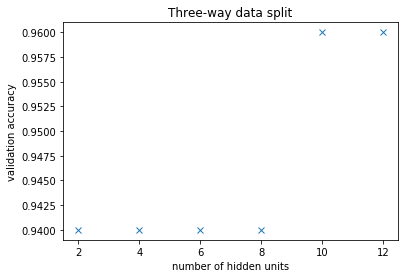

In [5]:
plt.figure(1)
plt.plot(hidden_units, acc, marker = 'x', linestyle = 'None')
plt.xlabel('number of hidden units')
plt.ylabel('validation accuracy')
plt.title('Three-way data split')
plt.savefig('./figures/5.3a_1.png')